# CS585 Problem Set 5 (Total points: 35 + 10 bonus)

Assignment adapted from Svetlana Lazebnik

### Instructions

1.  Assignment is due at **5 PM on Tuesday Apr 5 2022**.

2.  Submission instructions:

    1.  A single `.pdf` report that contains your work for Q1, Q2, Q3. For Q1 and Q2 you can either type out your responses in LaTeX, or
        any other word processing software.  You can also hand write them on a
        tablet, or scan in hand-written answers. If you hand-write, please make
        sure they are neat and legible. If you are scanning, make sure that the
        scans are legible. Lastly, convert your work into a `PDF`. 

        For Q3 your response should be electronic (no handwritten responses
        allowed). You should respond to the questions
        individually and include images as necessary. Your response to Q3 in
        the PDF report should be self-contained. It should include all the
        output you want us to look at. You will not receive credit for any
        results you have obtained, but failed to include directly in the PDF
        report file. 

        PDF file should be submitted to
        [Gradescope](https://www.gradescope.com) under `PS5`. Please tag the reponses in your PDF with the Gradescope
        questions outline  as described in
        [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). 

    2.  You also need to submit code for Q3 in the form of a single
        `.zip` file that includes all your code, all in the same
        directory. You can submit Python code in
        `.ipynb` format. Code should also be submitted to
        [Gradescope](https://www.gradescope.com) under `PS5-Code`. 
        *Not submitting your code will lead to a loss of
        100% of the points on Q3.*

    3.  We reserve the right to take off points for not following
        submission instructions. In particular, please tag the reponses
        in your PDF with the Gradescope questions outline as described
        in [Submitting an Assignment](https://youtu.be/u-pK4GzpId0). 



### Problems

1. **Epipolar Geometry [15 pts total].** Let $M1$ and $M2$ be two camera matrices. We know that the fundamental matrix corresponding to these camera matrices is of the following form:
$$F = [a]×A,$$
where $[a]×$ is the matrix
$$[a]× = \begin{bmatrix}
0 & ay & −az
−ay & 0 & ax
az & −ax & 0\end{bmatrix}.$$
Assume that $M1 = [I|0]$ and $M2 = [A|a]$, where $A$ is a 3 × 3 (nonsingular) matrix. 

  1.1. **Combining with optical flow [5 pts]**. Propose an approach to modifies your optical flow implementation from Lab 5 to use epipolar geometry.



  1.2. **Epipoles [10 pts]** Prove that the last column of $M2$, denoted by $a$, is one of the epipoles and draw your result in a diagram similar to the following image:






#### 1.1

The Lucas-Kanade algorithm implemented in lab 5 to estimate optical flow is based on a constant brightness constraint and the constraint that neighboring pixels between images move in a similar way. To modify this implementation to use epipolar geometry we would introduce the constraint that corresponding pixels (key points) between images also must adhere to the epipolar constraint: these cooresponding points must lie on epipolar lines. We could then use these projected points on the epipolar line from the first image to get more accurate cooresponding points for the next image. Thus, the constant brightness constraint could become less of a hard constraint (as it often causes issues in the Lucas-Kanade algorithm) as we will be relying more on the epipolar lines to give us the locations of cooresponding coordinates between images. 


#### 1.2
$$F = [a]_×A \text{ and } F^T = A^T[a]^T_×$$

$$ [a]_× = \begin{bmatrix} 
0 & ay & -az \\
-ay & 0 & ax \\
az & -ax & 0  \end{bmatrix} = -[a]_×^T$$

$$ \text{Thus, } -[a]_× = [a]_×^T $$ 

$$ F^Ta = A^T[a]^T_xa = -A^T[a]_xa = -A0 \text{ since } [a]_xa = 0$$

And we have, 

$$ F^Te' = 0 \text{ and since, } F^Ta = 0 \text{ then, } a = e' $$ 

Therefore, the last column of $M2$, $a$, is an epipole.


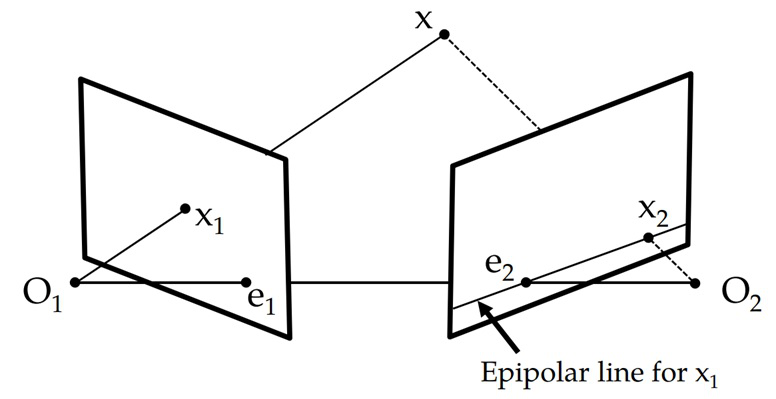

In [1]:
from PIL import Image
from IPython.display import display
display(Image.open('epipolar.jpg'))

  
2. **3D Estimation [10 pts bonus].** Design a bundle adjuster that allows for arbitrary chains of transformations and prior knowledge about the unknowns, see [SZ Figures 11.14-11.15](http://szeliski.org/Book/) for an example.

3. **Vanishing points [20 pts total]** Using `ps5_example.jpg`, you need to estimate the three major orthogonal vanishing points. Use at least three manually selected lines to solve for each vanishing point. The starter code below provides an interface for selecting and drawing the lines, but the code for computing the vanishing point needs to be inserted. For details on estimating vanishing points, see Lab 6. 

In [2]:
%matplotlib tk
import matplotlib.pyplot as plt
import numpy as np

from PIL import Image

def get_input_lines(im, min_lines=3):
    """
    Allows user to input line segments; computes centers and directions.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        min_lines: minimum number of lines required
    Returns:
        n: number of lines from input
        lines: np.ndarray of shape (3, n)
            where each column denotes the parameters of the line equation
        centers: np.ndarray of shape (3, n)
            where each column denotes the homogeneous coordinates of the centers
    """
    n = 0
    lines = np.zeros((3, 0))
    centers = np.zeros((3, 0))

    plt.figure()
    plt.axis('off')
    plt.imshow(im)
    print(f'Set at least {min_lines} lines to compute vanishing point')
    print(f'The delete and backspace keys act like right clicking')
    print(f'The enter key acts like middle clicking')
    while True:
        print('Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input')
        clicked = plt.ginput(2, timeout=0, show_clicks=True)
        if not clicked or len(clicked) < 2:
            if n < min_lines:
                print(f'Need at least {min_lines} lines, you have {n} now')
                continue
            else:
                # Stop getting lines if number of lines is enough
                break

        # Unpack user inputs and save as homogeneous coordinates
        pt1 = np.array([clicked[0][0], clicked[0][1], 1])
        pt2 = np.array([clicked[1][0], clicked[1][1], 1])
        # Get line equation using cross product
        # Line equation: line[0] * x + line[1] * y + line[2] = 0
        line = np.cross(pt1, pt2)
        lines = np.append(lines, line.reshape((3, 1)), axis=1)
        # Get center coordinate of the line segment
        center = (pt1 + pt2) / 2
        centers = np.append(centers, center.reshape((3, 1)), axis=1)

        # Plot line segment
        plt.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], color='b')

        n += 1

    return n, lines, centers

def plot_lines_and_vp(ax, im, lines, vp):
    """
    Plots user-input lines and the calculated vanishing point.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        lines: np.ndarray of shape (3, n)
            where each column denotes the parameters of the line equation
        vp: np.ndarray of shape (3, )
    """
    bx1 = min(1, vp[0] / vp[2]) - 10
    bx2 = max(im.shape[1], vp[0] / vp[2]) + 10
    by1 = min(1, vp[1] / vp[2]) - 10
    by2 = max(im.shape[0], vp[1] / vp[2]) + 10
    
    ax.imshow(im)
    for i in range(lines.shape[1]):
        # break
        if lines[0, i] < lines[1, i]:
            pt1 = np.cross(np.array([1, 0, -bx1]), lines[:, i])
            pt2 = np.cross(np.array([1, 0, -bx2]), lines[:, i])
        else:
            pt1 = np.cross(np.array([0, 1, -by1]), lines[:, i])
            pt2 = np.cross(np.array([0, 1, -by2]), lines[:, i])
        pt1 = pt1 / pt1[2]
        pt2 = pt2 / pt2[2]
        ax.plot([pt1[0], pt2[0]], [pt1[1], pt2[1]], 'g')

    ax.plot(vp[0] / vp[2], vp[1] / vp[2], 'ro')
    ax.set_xlim([bx1, bx2])
    ax.set_ylim([by2, by1])

def get_top_and_bottom_coordinates(im, obj):
    """
    For a specific object, prompts user to record the top coordinate and the bottom coordinate in the image.
    Inputs:
        im: np.ndarray of shape (height, width, 3)
        obj: string, object name
    Returns:
        coord: np.ndarray of shape (3, 2)
            where coord[:, 0] is the homogeneous coordinate of the top of the object and coord[:, 1] is the homogeneous
            coordinate of the bottom
    """
    plt.figure()
    plt.imshow(im)

    print('Click on the top coordinate of %s' % obj)
    clicked = plt.ginput(1, timeout=0, show_clicks=True)
    x1, y1 = clicked[0]
    # Uncomment this line to enable a vertical line to help align the two coordinates
    plt.plot([x1, x1], [0, im.shape[0]], 'b')
    print('Click on the bottom coordinate of %s' % obj)
    clicked = plt.ginput(1, timeout=0, show_clicks=True)
    x2, y2 = clicked[0]

    plt.plot([x1, x2], [y1, y2], 'b')

    return np.array([[x1, x2], [y1, y2], [1, 1]])

C:\Users\Adam\Anaconda3\lib\site-packages\numpy\_distributor_init.py:32: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\Adam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\Adam\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  stacklevel=1)


3.1. **Estimating Horizon [5 pts]** You should: a) plot the VPs and the lines used to estimate the vanishing points (VP) on the image plane using the provided code. b) Specify the VP pixel coordinates. c) Plot the ground horizon line and specify its parameters in the form $a * x + b * y + c = 0$. Normalize the parameters so that: $a^2 + b^2 = 1$.

In [3]:
def get_vanishing_point(lines):
    """
    Solves for the vanishing point using the user-input lines.
    """

    X = np.dot(lines, lines.T)
    
    U,S,V = np.linalg.svd(X)
    
    vpt = U[:, np.argmin(S)].T
    
    return vpt / vpt[-1]

def get_horizon_line(vpts):
    """
    Calculates the ground horizon line.
    """
    hline = np.cross(vpts[:, 0], vpts[:, 1])
    
    # normalize to a^2 + b^2 = 1
    
    hline /= np.sqrt(np.square(hline[0]) + np.square(hline[1]))
    
    return hline / hline[-1]

def plot_horizon_line(line_eq):
    """
    Plots the horizon line.
    """
    print('Horizon Line Equation: ', np.round(line_eq[0],4), 'x + ', \
          np.round(line_eq[1],4), 'y + ', np.round(line_eq[2],4), ' = 0')
    
    x = np.arange(im.shape[1])
    y = (- line_eq[2] - line_eq[0] * x) / line_eq[1]
    
    plt.figure()
    plt.imshow(im)
    plt.plot(x, y, 'ro', linewidth=2)    
    plt.show()
    plt.savefig('horizon_line.png')
    

im = np.asarray(Image.open('ps5_example.jpg'))


# Get vanishing points for each of the directions
num_vpts = 3
vpts = np.zeros((3, num_vpts))
for i in range(num_vpts):
    #break
    print('Getting vanishing point %d' % i)
    fig = plt.figure(); ax = fig.gca()
    # Get at least three lines from user input
    n, lines, centers = get_input_lines(im)

    # <YOUR CODE> Solve for vanishing point
    vpts[:, i] = get_vanishing_point(lines)
    vpts[:,i] /= vpts[:,i][i]
    
    # Plot the lines and the vanishing point
    plot_lines_and_vp(ax, im, lines, vpts[:, i])
    fig.savefig(f'vanishing_point{i}.png')

# <YOUR IMPLEMENTATION> Get the ground horizon line
horizon_line = get_horizon_line(vpts)
# <YOUR IMPLEMENTATION> Plot the ground horizon line
plot_horizon_line(horizon_line)

Getting vanishing point 0
Set at least 3 lines to compute vanishing point
The delete and backspace keys act like right clicking
The enter key acts like middle clicking
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Getting vanishing point 1
Set at least 3 lines to compute vanishing point
The delete and backspace keys act like right clicking
The enter key acts like middle clicking
Click the two endpoints, use the right button (delete and backspace keys) to undo, and use the middle button to stop input
Click the two endpoints, use the right button (de

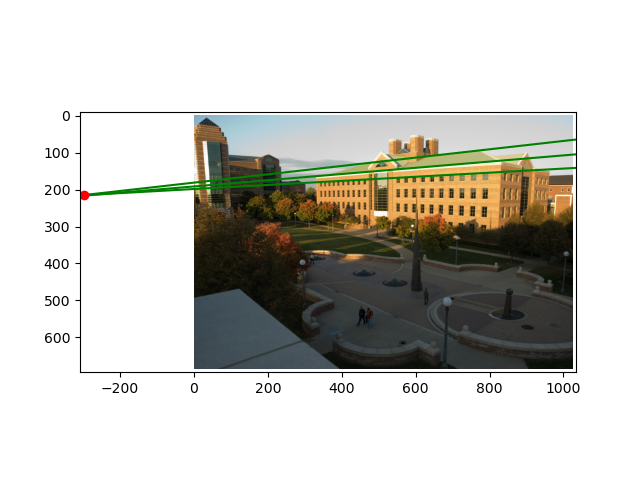

In [7]:
display(Image.open('vanishing_point0.png'))

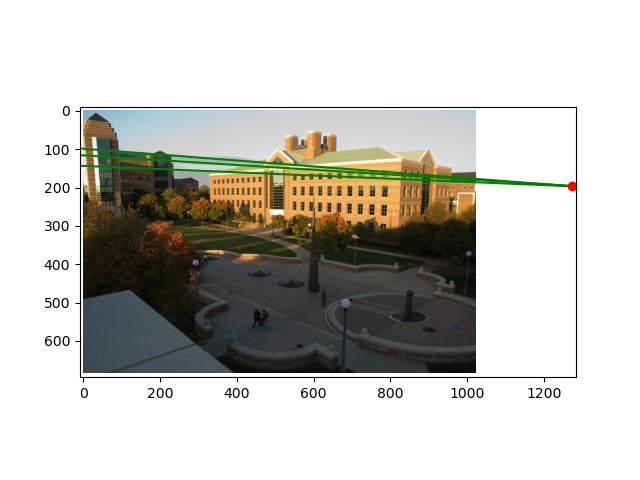

In [8]:
display(Image.open('vanishing_point1.png'))

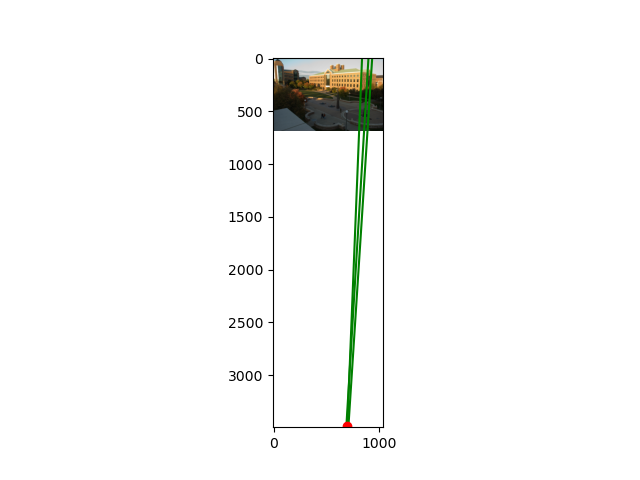

In [9]:
display(Image.open('vanishing_point2.png'))

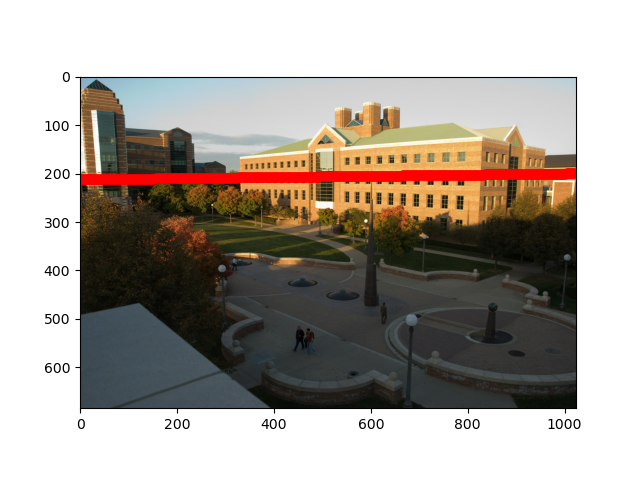

In [10]:
display(Image.open('horizon_line.png'))

3.2. **Solving for camera parameters [5 pts]** Using the fact that the vanishing directions are orthogonal, solve for the focal length and optical center (principal point) of the camera. Show all your work.

In [4]:
from sympy.solvers import solve
from sympy import symbols
from sympy import Matrix
import itertools

def get_camera_parameters(vpts):
    """
    Computes the camera parameters. Hint: The SymPy package is suitable for this.
    """
    vp1, vp2, vp3 = vpts[:, 0], vpts[:, 1], vpts[:, 2]
    
    A = []
    for (p1, p2) in itertools.combinations([vp1, vp2, vp3], 2):
        A.append([p1[0]*p2[0]+p1[1]*p2[1], p1[0]*p2[2]+p1[2]*p2[0], p1[1]*p2[2]+p1[2]*p2[1], p1[2]*p2[2]])
    u, s, v = np.linalg.svd(A, full_matrices=True)
    w1, w2, w3, w4 = v[-1,:]
    # form the omega matrix
    w = np.array([[w1, 0., w2],
                  [0., w1, w3],
                  [w2, w3, w4]])
    # w = (KK^T)^-1
    # K can be obtained by Cholesky factorization
    K_transpose_inv = np.linalg.cholesky(w)
    K = np.linalg.inv(K_transpose_inv.T)
    K = K / K[-1, -1]
    
    return K[0][0], K[0][2], K[1][2]
    

# <YOUR IMPLEMENTATION> Solve for the camera parameters (f, u, v)
f, u, v = get_camera_parameters(vpts)
print(f, u , v)

747.0071774318582 656.212633096156 384.052584581436


3.3. **Camera rotation matrix [5 pts]** Compute the rotation matrix for the camera, setting the vertical vanishing point as the Y-direction, the right-most vanishing point as the X-direction, and the left-most vanishing point as the Z-direction.

In [14]:
def get_rotation_matrix(vpts, f, u, v):
    """
    Computes the rotation matrix using the camera parameters.
    """
    vp1, vp2, vp3 = vpts[:, 0], vpts[:, 1], vpts[:, 2]
    
    K = np.array([[f, 0, u], [0, f, v], [0, 0, 1]])

    R = np.zeros((3,3))
    
    for i, vs in enumerate([vp1, vp2, vp3]):
        R[:, i] = K.dot(vs)
    
    return R
    
    
# <YOUR IMPLEMENTATION> Solve for the rotation matrix
R = get_rotation_matrix(vpts, f, u, v)
print(R)

[[ 7.44807038e+02  4.84754905e+03  5.19031799e+05]
 [-5.41251240e+02  7.48962115e+02  2.60205498e+06]
 [-3.35278429e-03  5.09028672e-03  1.00000000e+00]]


3.4. **Measurement estimation [5 pts]** Estimate the heights of (a) the large building in the center of the image, (b) the spike statue, and (c) the lamp posts assuming that the person nearest to the spike is 5ft 6in tall. In the report, show all the lines and measurements used to perform the calculation. How do the answers change if you assume the person is 6ft tall?

In [6]:
def estimate_height(p_coords, o_coords, hline, obj):
    """
    Estimates height for a specific object using the recorded coordinates. You might need to plot additional images here for
    your report.
    """
    H = 5.5
    H1 = 6
    
    vx, vy, vz = vpts[:, 0], vpts[:, 1], vpts[:, 2]
    
    t0, b0 = p_coords[:, 0], p_coords[:, 1]
    r, b = o_coords[:, 0], o_coords[:, 1]

    v = np.cross(np.cross(b0, b), np.cross(vx, vy))
    v /= v[-1]
    
    t = np.cross(np.cross(v,t0), np.cross(r, b))
    t /= t[-1]
    
    R = H * ( (np.linalg.norm((r - b)) / np.linalg.norm((t - b))) * (np.linalg.norm((vz - t)) / np.linalg.norm((vz - r))) )  
    
    R1 = H1 * ( (np.linalg.norm((r - b)) / np.linalg.norm((t - b))) * (np.linalg.norm((vz - t)) / np.linalg.norm((vz - r))) )
    
    print('Estimation with 5 ft 6 in: ', R)
    print('Estimation with 6 ft ', R1)
    
    plt.figure()
    plt.imshow(im)
    plt.plot([t0[0], b0[0]], [t0[1], b0[1]], linewidth=1)
    plt.plot([b[0], b0[0]], [b[1], b0[1]], linewidth=1)
    plt.plot([t0[0], t[0]], [t0[1], t[1]], linewidth=1)
    
    x = np.arange(im.shape[1])
    y = (- hline[2] - hline[0] * x) / hline[1]
    plt.plot(x, y, linewidth=1)   
    
    plt.plot([b[0], v[0]], [b[1], v[1]], linewidth=1)
    plt.plot([t[0], v[0]], [t[1], v[1]], linewidth=1)
    
    plt.show()
    plt.savefig(f'{obj}.png')
    
    return R
    

# Record image coordinates for each object and store in map
objects = ('person', 'Building', 'the spike statue', 'the lamp posts')
coords = dict()
for obj in objects:
    coords[obj] = get_top_and_bottom_coordinates(im, obj)

# <YOUR IMPLEMENTATION> Estimate heights
for obj in objects[1:]:
    print('Estimating height of %s' % obj)
    height = estimate_height(coords['person'], coords[obj], horizon_line, obj)

Click on the top coordinate of person
Click on the bottom coordinate of person
Click on the top coordinate of Building
Click on the bottom coordinate of Building
Click on the top coordinate of the spike statue
Click on the bottom coordinate of the spike statue
Click on the top coordinate of the lamp posts
Click on the bottom coordinate of the lamp posts
Estimating height of Building
Estimation with 5 ft 6 in:  86.69868086009608
Estimation with 6 ft  94.58037912010482
Estimating height of the spike statue
Estimation with 5 ft 6 in:  29.523673285541054
Estimation with 6 ft  32.2076435842266
Estimating height of the lamp posts
Estimation with 5 ft 6 in:  17.17712809177312
Estimation with 6 ft  18.73868519102522


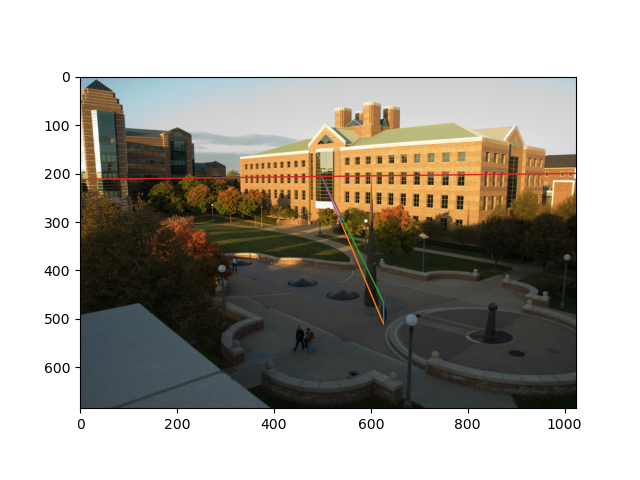

In [11]:
display(Image.open('Building.png'))

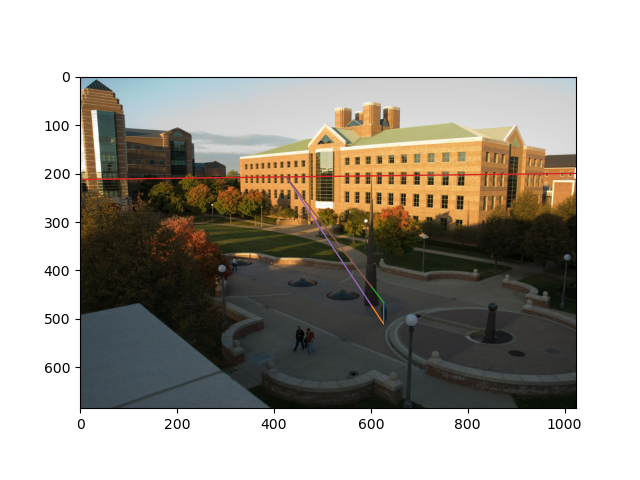

In [12]:
display(Image.open('the spike statue.png'))

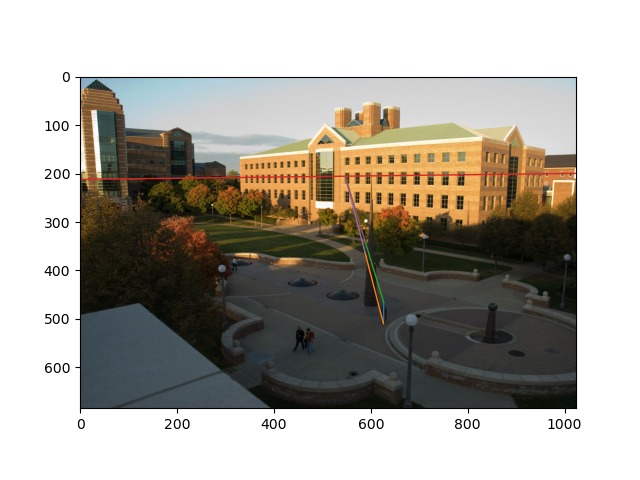

In [13]:
display(Image.open('the lamp posts.png'))